<h2> Compresia de imagini folosind descompunerea in valori singulare </h2>

Text(0.5, 1.0, 'Imaginea originala')

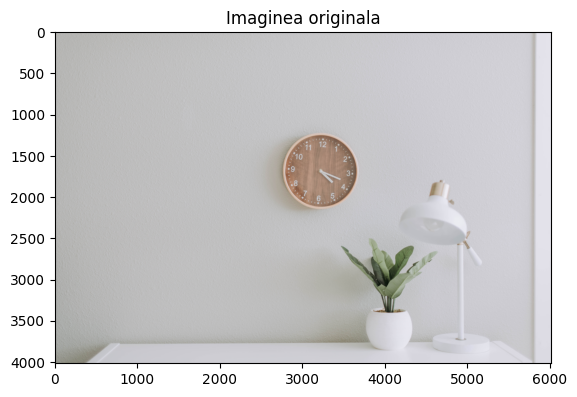

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

A =  mpimg.imread('imagine.jpg')
fig1 =plt.figure(1)
plt.imshow(A)
plt.title('Imaginea originala')

Extragerea celor 3 culori componente

In [2]:
R = A[:,:,0]
G = A[:,:,1] 
B = A[:,:,2] 

Aplicarea SVD pe cele 3 canale(RGB)

In [3]:
R_U, R_S, R_VT = np.linalg.svd(R,full_matrices=False)
G_U, G_S, G_VT = np.linalg.svd(G,full_matrices=False)
B_U, B_S, B_VT = np.linalg.svd(B,full_matrices=False)

Graficele procent informatie vs valori singulare pentru cele 3 canale


Text(0, 0.5, 'Procent informatie')

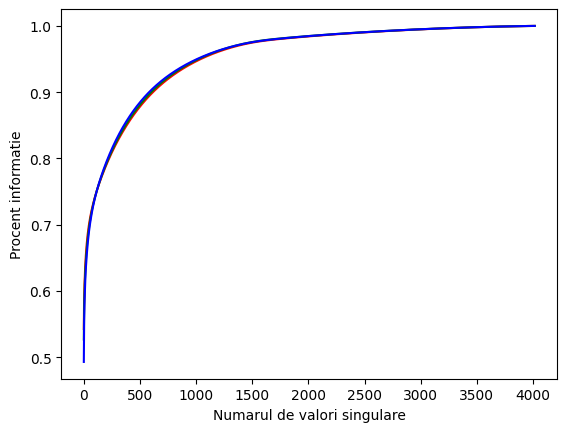

In [4]:
plt.figure(2)
procent_R = np.cumsum(R_S) / np.sum(R_S)
procent_G = np.cumsum(G_S) / np.sum(G_S)
procent_B = np.cumsum(B_S) / np.sum(B_S)
plt.plot(procent_R,color='red')
plt.plot(procent_G,color='green')
plt.plot(procent_B,color='blue')
plt.xlabel('Numarul de valori singulare')
plt.ylabel('Procent informatie')


Valorile singulare plotate logaritmic

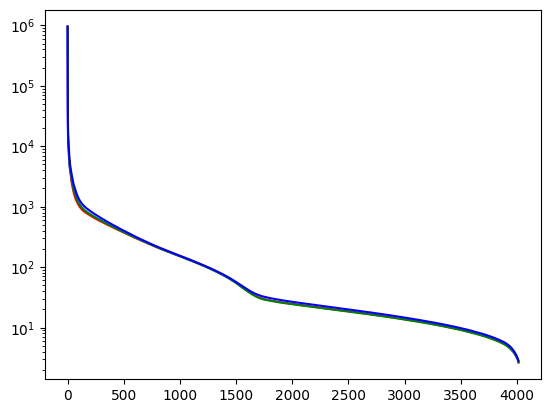

In [5]:
plt.semilogy(R_S,'r')
plt.semilogy(G_S,'g')
plt.semilogy(B_S,'b')

Generarea vectorului de dimensiune minim care retine 90% din informatie

In [6]:
threshold = 0.9
R_rank = np.argmax(procent_R > threshold) + 1  # Numărul minim de componente care retin 90% din informație
print(R_rank)
G_rank = np.argmax(procent_G > threshold) + 1  # Numărul minim de componente care retin 90% din informație
print(G_rank)
B_rank = np.argmax(procent_B > threshold) + 1  # Numărul minim de componente care retin 90% din informație
print(B_rank)
max_rank = max(R_rank, G_rank, B_rank)



617
602
582


In [7]:
import os
k=5;
def compress(rank, k):
  R_compressed = R_U[:, :rank] @ np.diag(R_S[:rank]) @ R_VT[:rank, :]

  G_compressed = G_U[:, :rank] @ np.diag(G_S[:rank]) @ G_VT[:rank, :]


  B_compressed = B_U[:, :rank] @ np.diag(B_S[:rank]) @ B_VT[:rank, :]

  compressed = np.stack((R_compressed, G_compressed, B_compressed), axis=2)
  compressed = compressed.astype(np.uint8)
  rows,cols=R_compressed.shape
  compress_ratio=(rows*rank+rank+rank*cols)/(rows*cols)
  compressed = np.clip(compressed, 0, 255).astype(np.uint8)
  mpimg.imsave(f'compressed{k}.jpg', compressed)
  compressed_image_path = f'compressed{k}.jpg'
  plt.figure(k)
  plt.imshow(compressed)
  plt.title(f'Reconstructie utilizand {rank} valori singulare')
  print(f'Rata de compresie: {compress_ratio}')

  k = k + 1
    

5. Utilizati elementele vectorului pentru a reconstrui imaginile.

Rata de compresie: 0.2562208364017335


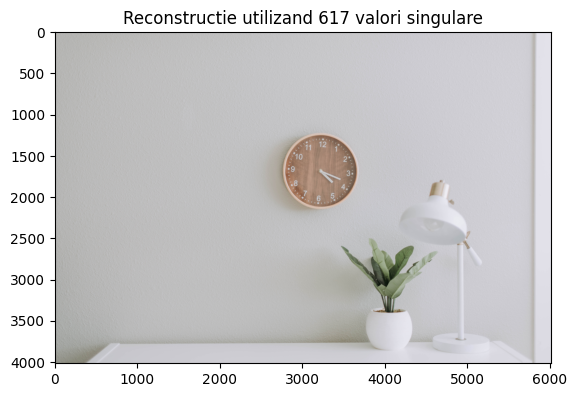

In [8]:
compress(max_rank,max_rank)


Rata de compresie: 0.002076343893044842
Rata de compresie: 0.004152687786089684
Rata de compresie: 0.008305375572179368
Rata de compresie: 0.01038171946522421
Rata de compresie: 0.04152687786089684
Rata de compresie: 0.1038171946522421
Rata de compresie: 0.16610751144358735
Rata de compresie: 0.2562208364017335


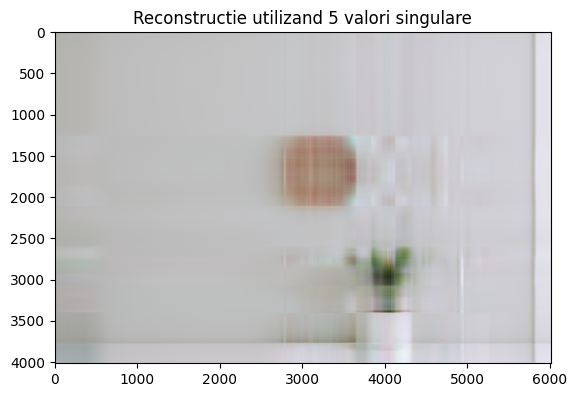

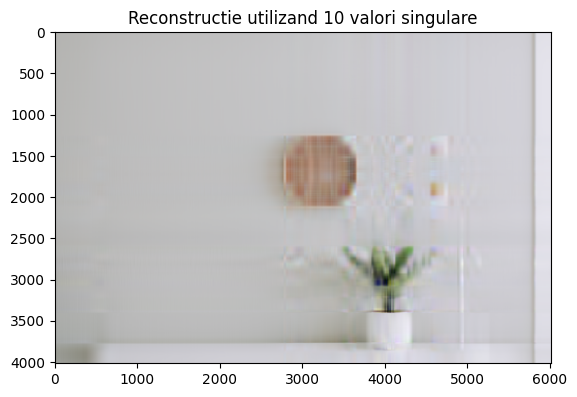

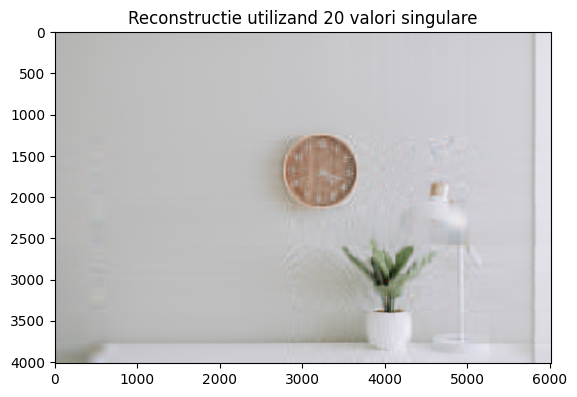

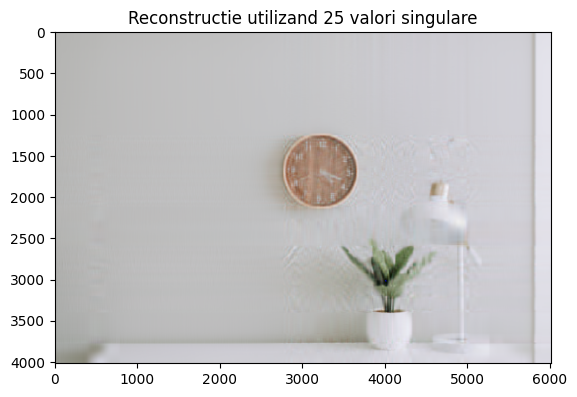

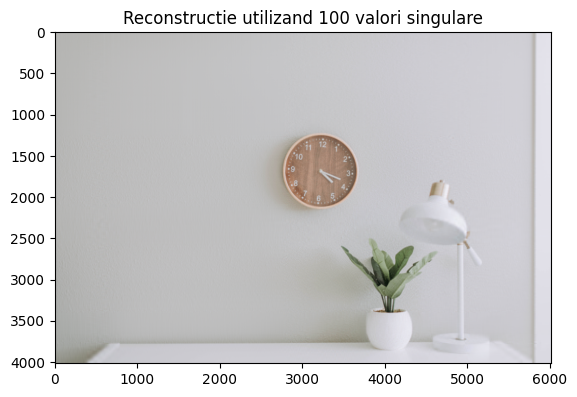

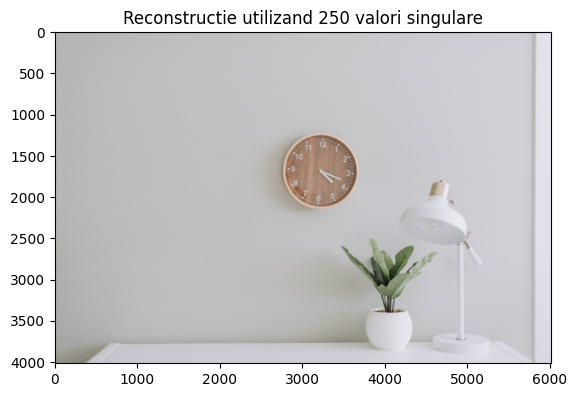

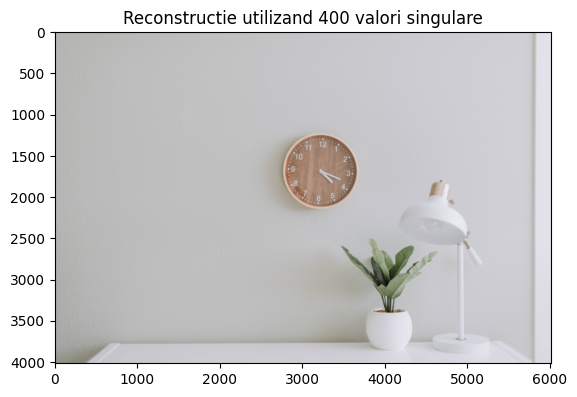

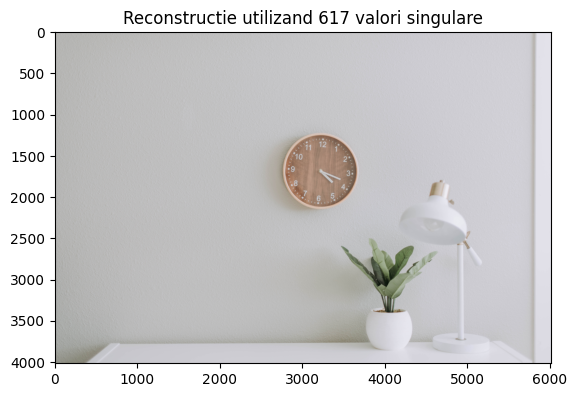

In [9]:
nr=[5, 10, 20, 25 ,100, 250, 400, max_rank]
k=5
for i in nr:
    compress(i,i)